In [1]:
pip install matplotlib==3.5.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib
matplotlib.__version__

'3.5.2'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

import io
data = pd.read_csv(io.BytesIO(uploaded['advertising.csv']))

Saving advertising.csv to advertising (1).csv


In [5]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [6]:
data.isnull().values.any()

False

In [7]:
data.duplicated().values.any()

False

In [8]:
data.columns = ["On_site", "Age", "Area_income", "Internet_usage", "Ad_topic_line", "City", "Male", "Country", "Timestamp", "Clicked"]

In [9]:
data

,On_site,Age,Area_income,Internet_usage,Ad_topic_line,City,Male,Country,Timestamp,Clicked
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [10]:
sns.set()

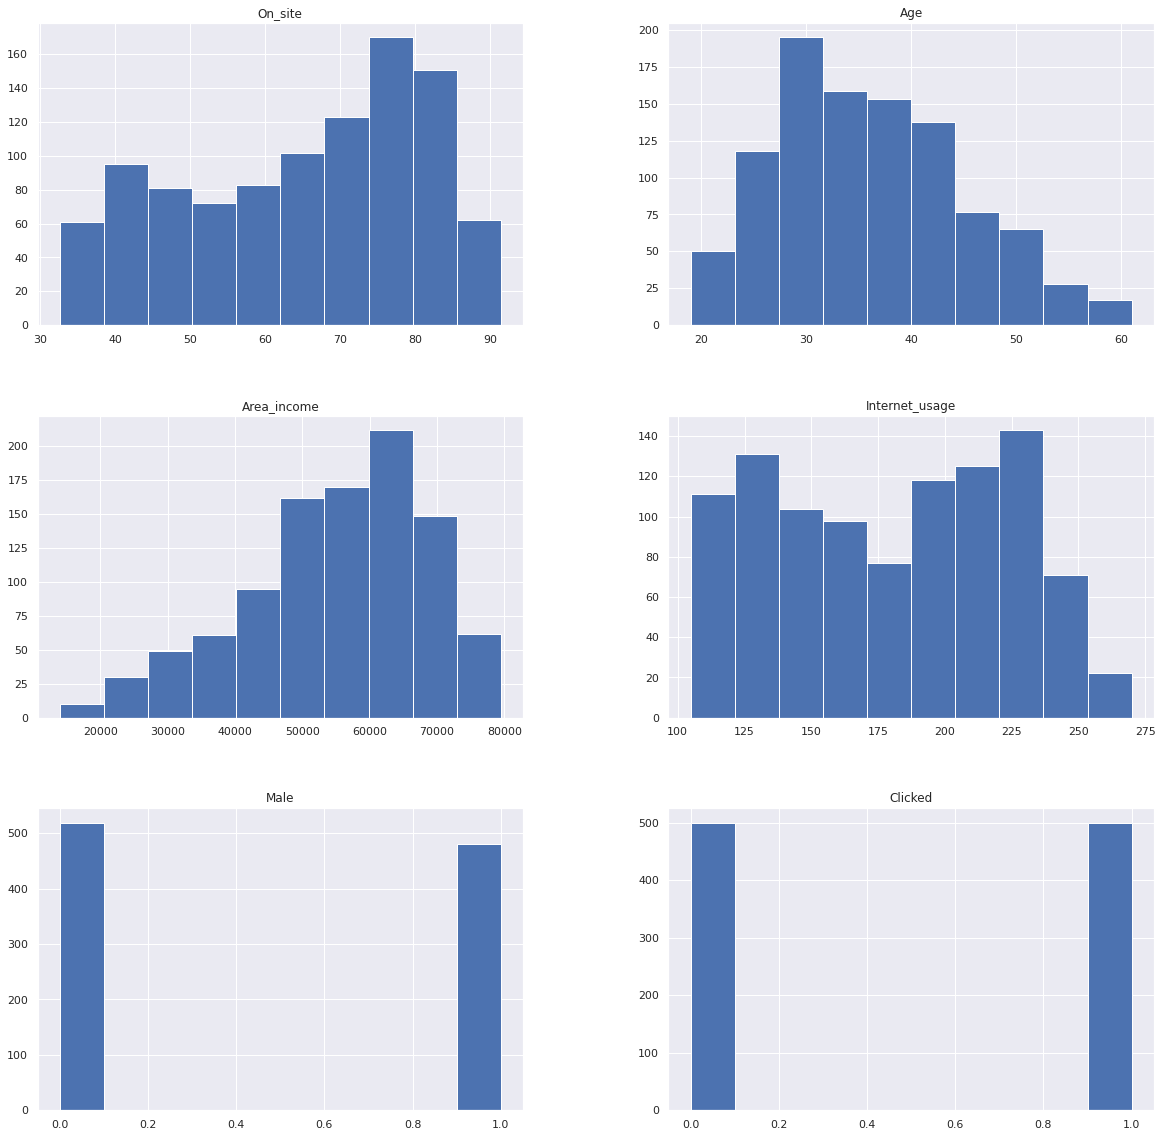

In [11]:
data.hist(figsize=(20, 20))
plt.show()

In [12]:
age = pd.cut(data.Age, bins = [0,24,34,44,54,64])
age = pd.DataFrame(age.value_counts().sort_index(ascending = True))
age

,Age
"(0, 24]",71
"(24, 34]",412
"(34, 44]",330
"(44, 54]",161
"(54, 64]",26


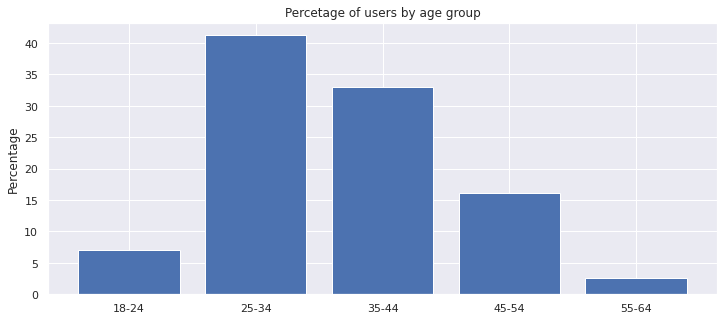

In [13]:
y= age['Age']/len(data) *100
x= ['18-24', '25-34', '35-44', '45-54','55-64']

plt.figure(figsize=(12,5))
plt.bar(x,y)
plt.title('Percetage of users by age group')
plt.ylabel('Percentage')
plt.show()

In [14]:
age['Age']/len(data) *100

(0, 24]      7.1
(24, 34]    41.2
(34, 44]    33.0
(44, 54]    16.1
(54, 64]     2.6
Name: Age, dtype: float64

In [15]:
clicked1 = data[data.Clicked == 1]
clicked1

,On_site,Age,Area_income,Internet_usage,Ad_topic_line,City,Male,Country,Timestamp,Clicked
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
10,47.64,49,45632.51,122.02,Centralized neutral neural-net,West Brandonton,0,Qatar,2016-03-16 20:19:01,1
12,69.57,48,51636.92,113.12,Centralized content-based focus group,West Katiefurt,1,Egypt,2016-06-03 01:14:41,1
14,42.95,33,30976.00,143.56,Grass-roots coherent extranet,West William,0,Barbados,2016-03-24 09:31:49,1
15,63.45,23,52182.23,140.64,Persistent demand-driven interface,New Travistown,1,Spain,2016-03-09 03:41:30,1
...,...,...,...,...,...,...,...,...,...,...
994,43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1


In [16]:
age_clicked = pd.cut(clicked1.Age, bins = [0,24,34,44,54,64])
age_clicked = pd.DataFrame(age_clicked.value_counts().sort_index(ascending = True))

In [17]:
age_clicked['Age']

(0, 24]      17
(24, 34]    119
(34, 44]    194
(44, 54]    144
(54, 64]     26
Name: Age, dtype: int64

In [18]:
age18_24 = data[data['Age'] < 25]
age25_34 = data[(data['Age'] >=25) & (data['Age'] <= 34)]
age35_44 = data[(data['Age'] >=35) & (data['Age'] <= 44)]
age45_54 = data[(data['Age'] >=45) & (data['Age'] <= 54)]
age55_64 = data[(data['Age'] >=55) & (data['Age'] <= 64)]

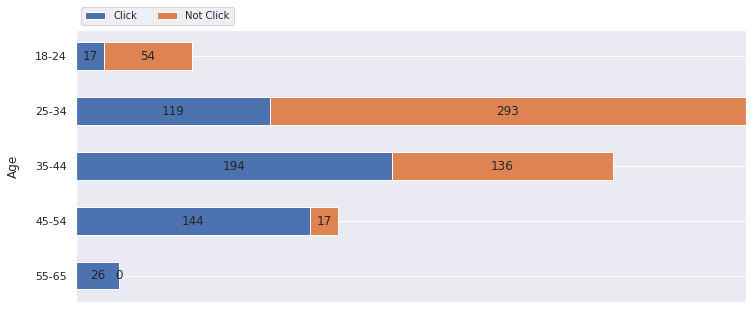

In [19]:
category_names = ['Click', 'No Click']
results = {
    '18-24': [len(age18_24[age18_24.Clicked == 1]), len(age18_24[age18_24.Clicked == 0])],
    '25-34': [len(age25_34[age25_34.Clicked == 1]), len(age25_34[age25_34.Clicked == 0])],
    '35-44': [len(age35_44[age35_44.Clicked == 1]), len(age35_44[age35_44.Clicked == 0])],
    '45-54': [len(age45_54[age45_54.Clicked == 1]), len(age45_54[age45_54.Clicked == 0])],
    '55-65': [len(age55_64[age55_64.Clicked == 1]), len(age55_64[age55_64.Clicked == 0])]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)

    fig, ax = plt.subplots(figsize=(12,5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname) in enumerate(zip(category_names)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname)

   
        ax.bar_label(rects, label_type='center')
    ax.legend(['Click', 'Not Click'], ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.ylabel('Age', labelpad = 15)

plt.show()


In [20]:
age_clicked['Age']/len(clicked1)

(0, 24]     0.034
(24, 34]    0.238
(34, 44]    0.388
(44, 54]    0.288
(54, 64]    0.052
Name: Age, dtype: float64

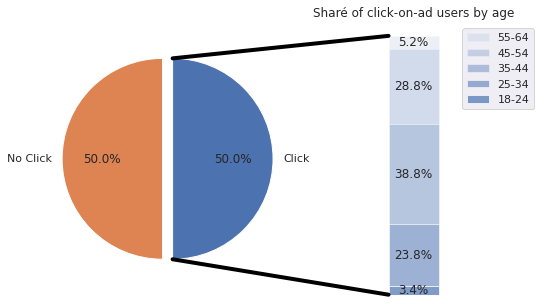

In [21]:
from matplotlib.patches import ConnectionPatch
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [len(data[data.Clicked == 1]), len(data[data.Clicked == 0])]
labels = ['Click', 'No Click']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = - 90
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [0.034, 0.238, 0.388, 0.288, 0.052]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
bottom = 1
width = .2
angle = -90 * overall_ratios[0]
# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.15 * j)
    ax2.bar_label(bc, labels=[f"{height:.1%}"], label_type='center')

ax2.set_title('Age of clickers')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.title('Sharé of click-on-ad users by age')
plt.show()


In [22]:
m18_24 = age18_24[(age18_24.Male == 1) & (age18_24.Clicked == 1)]
f18_24 = age18_24[(age18_24.Male == 0) & (age18_24.Clicked == 1)]

m25_34 = age25_34[(age25_34.Male == 1) & (age25_34.Clicked == 1)]
f25_34 = age25_34[(age25_34.Male == 0) & (age25_34.Clicked == 1)]

m35_44 = age35_44[(age35_44.Male == 1) & (age35_44.Clicked == 1)]
f35_44 = age35_44[(age35_44.Male == 0) & (age35_44.Clicked == 1)]

m45_54 = age45_54[(age45_54.Male == 1) & (age45_54.Clicked == 1)]
f45_54 = age45_54[(age45_54.Male == 0) & (age45_54.Clicked == 1)]

m55_64 = age55_64[(age55_64.Male == 1) & (age55_64.Clicked == 1)]
f55_64 = age55_64[(age55_64.Male == 0) & (age55_64.Clicked == 1)]

In [23]:
m_clicked1 = clicked1[clicked1.Male == 1]
f_clicked1 = clicked1[clicked1.Male == 0]

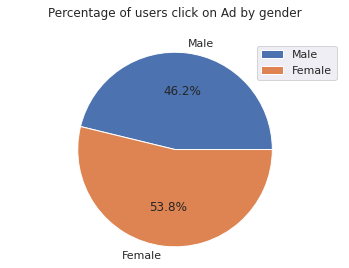

In [24]:
plt.pie(x=[len(m_clicked1), len(f_clicked1)], labels= ['Male', 'Female'], autopct = '%0.1f%%')
plt.axis('equal')
plt.title('Percentage of users click on Ad by gender', y=1.08)
plt.legend()
plt.show()

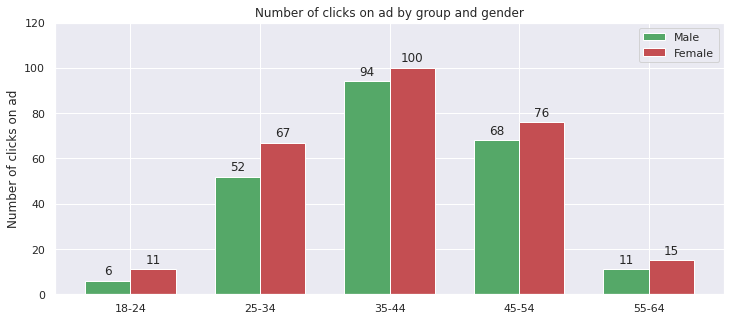

In [25]:
m_age = [len(m18_24), len(m25_34), len(m35_44), len(m45_54), len(m55_64)]
f_age = [len(f18_24), len(f25_34), len(f35_44), len(f45_54), len(f55_64)]

# Add label locations
x = np.arange(len(['18-24', '25-34', '35-44', '45-54','55-64'])) 
width = 0.35

fig, ax = plt.subplots(figsize= (12,5))

rects1 = ax.bar(x - width/2,
m_age, width, label='Male', color = 'g')
rects2 = ax.bar(x + width/2,
f_age, width, label='Female', color = 'r')
# Add labels, title and custom x-axis tick labels
ax.set_ylabel('Number of clicks on ad')
ax.set_title('Number of clicks on ad by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(['18-24', '25-34', '35-44', '45-54','55-64'])
ax.set_yticks(np.linspace(0, 120, 7))


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

ax.legend()
plt.show()

In [26]:
clicked0 = data[data.Clicked == 0]
clicked0

,On_site,Age,Area_income,Internet_usage,Ad_topic_line,City,Male,Country,Timestamp,Clicked
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
986,76.44,28,59967.19,232.68,Synchronized human-resource moderator,Port Julie,1,Northern Mariana Islands,2016-04-06 17:26:37,0
988,89.71,48,51501.38,204.40,Versatile local forecast,Sarafurt,1,Bahrain,2016-02-17 07:00:38,0
989,70.96,31,55187.85,256.40,Ameliorated user-facing help-desk,South Denise,0,Saint Pierre and Miquelon,2016-06-26 07:01:47,0
993,64.20,27,66200.96,227.63,Phased zero tolerance extranet,Edwardsmouth,1,Isle of Man,2016-02-11 23:45:01,0


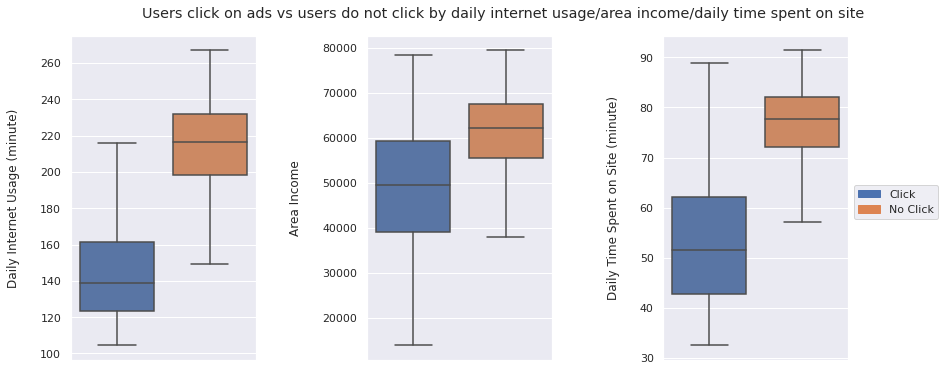

In [27]:
fig, ax = plt.subplots(1,3, constrained_layout=False, figsize=(12,5))
fig.suptitle('Users click on ads vs users do not click by daily internet usage/area income/daily time spent on site')

b1 = sns.boxplot(ax=ax[0], x='Clicked', y = 'Internet_usage', data=data, order = [1,0], showfliers=False)
ax[0].set_ylabel('Daily Internet Usage (minute)', labelpad=20)
ax[0].set_xlabel('')
ax[0].set_xticklabels(['', ''])

b2 = sns.boxplot(ax=ax[1], x='Clicked', y = 'Area_income', data=data, order = [1,0], showfliers=False)
ax[1].set_ylabel('Area Income', labelpad=20)
ax[1].set_xlabel('')
ax[1].set_xticklabels(['', ''])

b3 = sns.boxplot(ax=ax[2], x='Clicked', y = 'On_site', data=data, order = [1,0], showfliers=False)
ax[2].set_ylabel('Daily Time Spent on Site (minute)', labelpad=20)
ax[2].set_xlabel('')
ax[2].set_xticklabels(['', ''])

import matplotlib.patches as mpatches

orange_patch = mpatches.Patch(color='C0', label='Click')
blue_patch = mpatches.Patch(color='C1', label='No Click')
plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=0.9, 
                    top= 0.9, 
                    wspace=0.6, 
                    hspace=0.2)

fig.legend(handles=[orange_patch, blue_patch], loc='upper left', bbox_to_anchor=(0.9, 0.5))
plt.show()

In [28]:
country_clicked1 = clicked1.groupby(data['Country'])['Clicked'].sum()

In [29]:
country_clicked1

Country
Afghanistan          5
Albania              4
Algeria              3
American Samoa       3
Andorra              2
                    ..
Wallis and Futuna    1
Western Sahara       4
Yemen                2
Zambia               3
Zimbabwe             4
Name: Clicked, Length: 215, dtype: int64

In [30]:
top_country_clicked1 = country_clicked1.sort_values(ascending = False)
country_data = top_country_clicked1.head(10)[::-1]

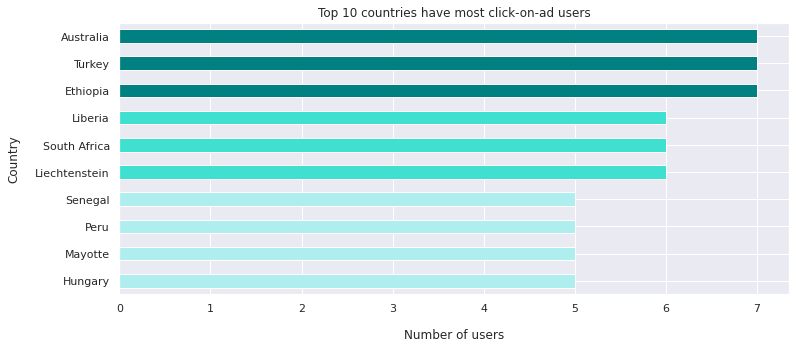

In [31]:
plt.figure(figsize = (12,5) )
top_country_clicked1.head(10).plot(kind="barh", color = ['teal', 'teal','teal','turquoise', 'turquoise','turquoise','paleturquoise','paleturquoise','paleturquoise','paleturquoise']).invert_yaxis()
plt.ylabel('Country' ,labelpad=15)
plt.xlabel('Number of users', labelpad = 15)
plt.title('Top 10 countries have most click-on-ad users')
plt.show()

In [32]:
country_income1 = clicked1.groupby(data['Country'])['Area_income'].median()
top_country_income1 = country_income1.sort_values(ascending = True)
country_data = top_country_income1.head(10)[::-1]
country_data

Country
Saint Pierre and Miquelon    28275.48
Tanzania                     27262.51
Norfolk Island               27155.10
Tunisia                      27073.27
Luxembourg                   25767.16
Marshall Islands             25371.52
Togo                         24316.61
Russian Federation           23821.72
Saint Lucia                  22456.04
Azerbaijan                   15598.29
Name: Area_income, dtype: float64

In [33]:
clicked1.Area_income[clicked1.Country == 'Senegal']

33     30227.98
195    51633.34
655    28495.21
734    56435.60
960    39939.39
Name: Area_income, dtype: float64

In [34]:
data['Timestamp_time'] = pd.to_datetime(data['Timestamp'], infer_datetime_format=True)

In [35]:
data.Timestamp_time

0     2016-03-27 00:53:11
1     2016-04-04 01:39:02
2     2016-03-13 20:35:42
3     2016-01-10 02:31:19
4     2016-06-03 03:36:18
              ...        
995   2016-02-11 21:49:00
996   2016-04-22 02:07:01
997   2016-02-01 17:24:57
998   2016-03-24 02:35:54
999   2016-06-03 21:43:21
Name: Timestamp_time, Length: 1000, dtype: datetime64[ns]

In [36]:
data.Timestamp_time.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    1000
unique                   1000
top       2016-03-27 00:53:11
freq                        1
first     2016-01-01 02:52:10
last      2016-07-24 00:22:16
Name: Timestamp_time, dtype: object

In [37]:
data_time = data.set_index('Timestamp_time', drop = True)

In [38]:
data['Hour'] = data_time.index.hour
data['Hour'].describe()

count    1000.000000
mean       11.660000
std         6.960952
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: Hour, dtype: float64

In [39]:
data.groupby('Hour').agg({'Clicked':'sum'})

,Clicked
Hour,
0,26
1,16
2,17
3,23
4,21
5,21
6,23
7,26
8,21


In [40]:
age18_24 = data[data['Age'] < 25]
age25_34 = data[(data['Age'] >=25) & (data['Age'] <= 34)]
age35_44 = data[(data['Age'] >=35) & (data['Age'] <= 44)]
age45_54 = data[(data['Age'] >=45) & (data['Age'] <= 54)]
age55_64 = data[(data['Age'] >=55) & (data['Age'] <= 64)]

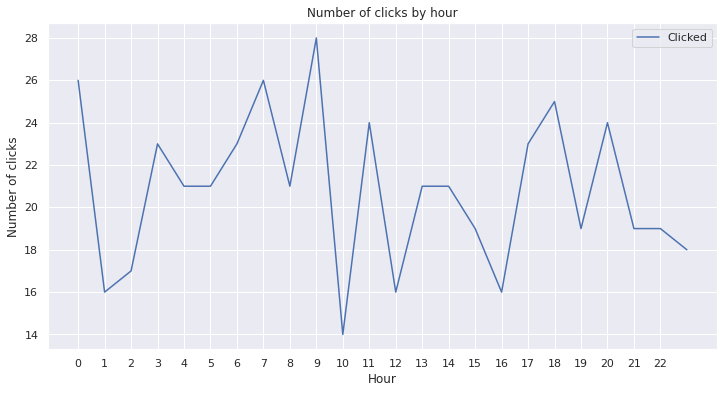

In [41]:
data.groupby('Hour').agg({'Clicked':'sum'}).plot(xticks = np.arange(0,23), figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');

In [42]:
clicked1=data[data.Clicked ==1]

In [45]:
data['Weekday'] = data_time.index.weekday
clicked1=data[data.Clicked ==1]
data['Weekday'].describe()

count    1000.000000
mean        3.064000
std         1.998474
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         6.000000
Name: Weekday, dtype: float64

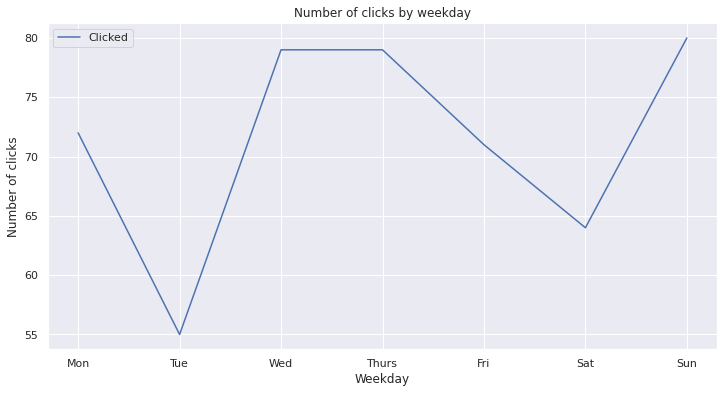

In [46]:
data.groupby('Weekday').agg({'Clicked':'sum'}).plot(figsize=(12,6))

ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tue Wed Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.ylabel('Number of clicks')
plt.title('Number of clicks by weekday');

In [47]:
data['Month'] = data_time.index.month
clicked1=data[data.Clicked ==1]
data['Month'].describe()

count    1000.000000
mean        3.817000
std         1.926973
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Month, dtype: float64

In [48]:
data.groupby('Month').agg({'Clicked':'sum'})

,Clicked
Month,
1,69
2,83
3,74
4,74
5,79
6,71
7,50


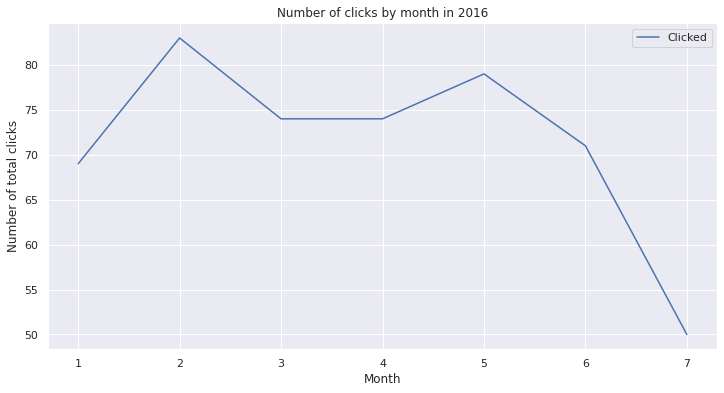

In [49]:
data.groupby('Month').agg({'Clicked':'sum'}).plot(figsize=(12,6))

plt.ylabel('Number of total clicks')
plt.title('Number of clicks by month in 2016');

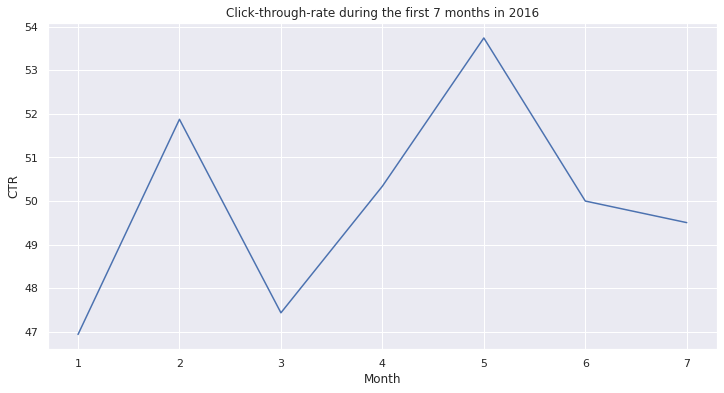

In [50]:
df_day = data[['Month','Clicked']].groupby(['Month']).count().reset_index()
df_day['Clicked1'] = clicked1[['Month','Clicked']].groupby(['Month']).count().reset_index()['Clicked']
df_day['CTR'] = df_day['Clicked1']/df_day['Clicked']*100

plt.figure(figsize=(12,6))
sns.lineplot(y='CTR', x='Month', data=df_day)

plt.title('Click-through-rate during the first 7 months in 2016')
plt.show()

### **Code do not use in report**

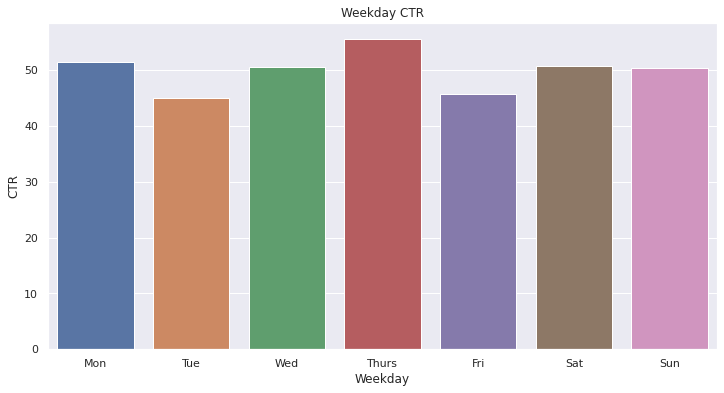

In [51]:
df_day = data[['Weekday','Clicked']].groupby(['Weekday']).count().reset_index()
df_day['Clicked1'] = clicked1[['Weekday','Clicked']].groupby(['Weekday']).count().reset_index()['Clicked']
df_day['CTR'] = df_day['Clicked1']/df_day['Clicked']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='Weekday', data=df_day)

ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tue Wed Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('Weekday CTR');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


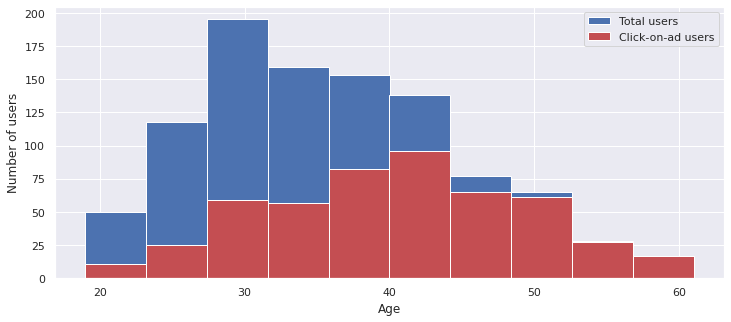

In [52]:
plt.figure(figsize = (12,5))
plt.ylabel('Number of users')
plt.xlabel('Age')
data['Age'].hist()
clicked1['Age'].hist(color='r')
plt.legend([data['Age'], clicked1['Age']], labels = ['Total users', 'Click-on-ad users'])
plt.show()

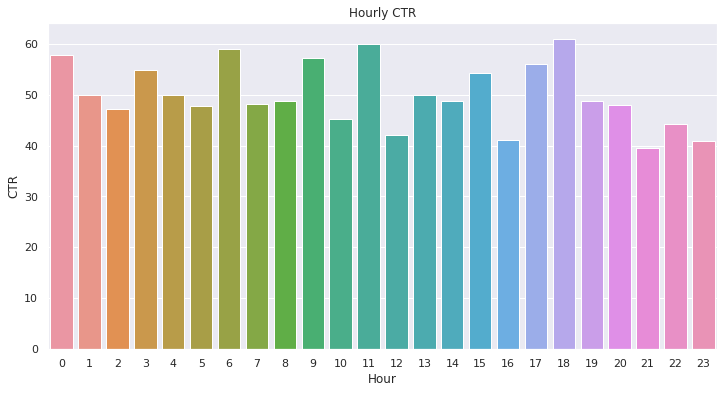

In [53]:
df_hour = data[['Hour','Clicked']].groupby(['Hour']).count().reset_index()
df_hour['Clicked1'] = clicked1[['Hour','Clicked']].groupby(['Hour']).count().reset_index()['Clicked']
df_hour['CTR'] = df_hour['Clicked1']/df_hour['Clicked']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='Hour', data=df_hour)
plt.title('Hourly CTR');

In [54]:
df_hour
sum(df_hour['Clicked1'])/sum(df_hour['Clicked'])

0.5

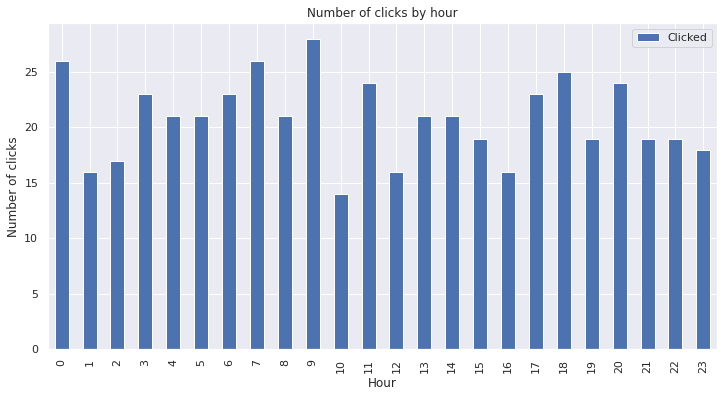

In [55]:
data.groupby('Hour').agg({'Clicked':'sum'}).plot(kind = 'bar', xticks = np.arange(0,24), figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');

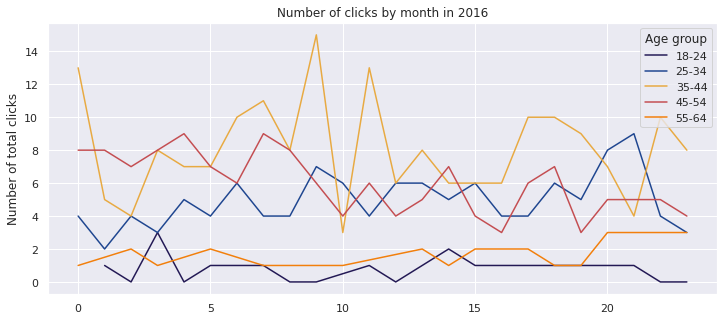

In [56]:
plt.figure(figsize = (12,5))

plt.plot(age18_24.groupby('Hour').agg({'Clicked':'sum'}), label = '18-24', color = '#231955')
plt.plot(age25_34.groupby('Hour').agg({'Clicked':'sum'}), label = '25-34', color = '#1F4690')
plt.plot(age35_44.groupby('Hour').agg({'Clicked':'sum'}), label = '35-44', color = '#E8AA42')
plt.plot(age45_54.groupby('Hour').agg({'Clicked':'sum'}), label = '45-54', color = 'r')
plt.plot(age55_64.groupby('Hour').agg({'Clicked':'sum'}), label = '55-64', color = '#f27f0c')
plt.legend(title = 'Age group' , loc = 'upper right')

plt.ylabel('Number of total clicks')
plt.title('Number of clicks by month in 2016');

In [59]:
age18_24 = data[data['Age'] < 25]
age25_34 = data[(data['Age'] >=25) & (data['Age'] <= 34)]
age35_44 = data[(data['Age'] >=35) & (data['Age'] <= 44)]
age45_54 = data[(data['Age'] >=45) & (data['Age'] <= 54)]
age55_64 = data[(data['Age'] >=55) & (data['Age'] <= 64)]

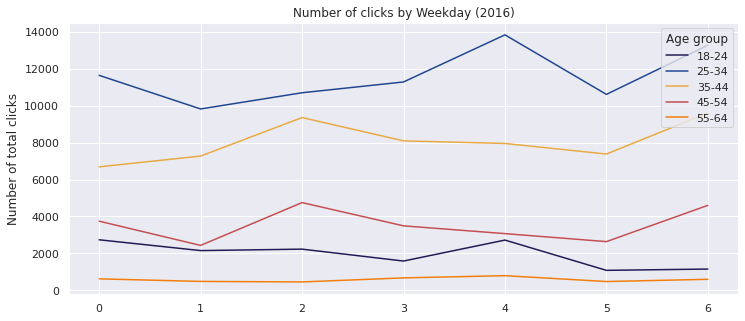

In [61]:
plt.figure(figsize = (12,5))

plt.plot(age18_24.groupby('Weekday').agg({'Internet_usage':'sum'}), label = '18-24', color = '#231955')
plt.plot(age25_34.groupby('Weekday').agg({'Internet_usage':'sum'}), label = '25-34', color = '#1F4690')
plt.plot(age35_44.groupby('Weekday').agg({'Internet_usage':'sum'}), label = '35-44', color = '#E8AA42')
plt.plot(age45_54.groupby('Weekday').agg({'Internet_usage':'sum'}), label = '45-54', color = 'r')
plt.plot(age55_64.groupby('Weekday').agg({'Internet_usage':'sum'}), label = '55-64', color = '#f27f0c')
plt.legend(title = 'Age group' , loc = 'upper right')

plt.ylabel('Number of total clicks')
plt.title('Number of clicks by Weekday (2016)');

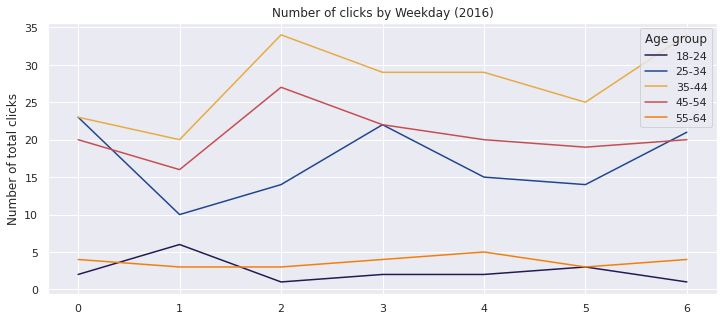

In [62]:
plt.figure(figsize = (12,5))

plt.plot(age18_24.groupby('Weekday').agg({'Clicked':'sum'}), label = '18-24', color = '#231955')
plt.plot(age25_34.groupby('Weekday').agg({'Clicked':'sum'}), label = '25-34', color = '#1F4690')
plt.plot(age35_44.groupby('Weekday').agg({'Clicked':'sum'}), label = '35-44', color = '#E8AA42')
plt.plot(age45_54.groupby('Weekday').agg({'Clicked':'sum'}), label = '45-54', color = 'r')
plt.plot(age55_64.groupby('Weekday').agg({'Clicked':'sum'}), label = '55-64', color = '#f27f0c')
plt.legend(title = 'Age group' , loc = 'upper right')

plt.ylabel('Number of total clicks')
plt.title('Number of clicks by Weekday (2016)');

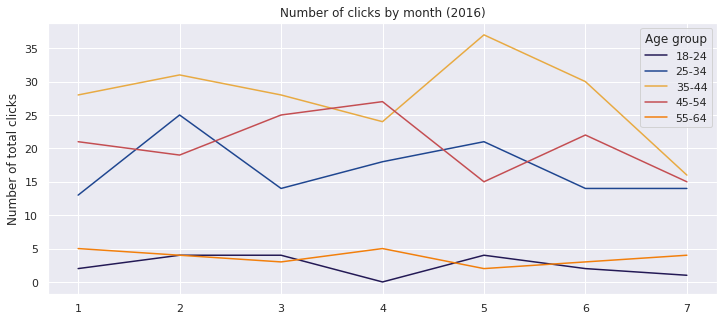

In [63]:
plt.figure(figsize = (12,5))

plt.plot(age18_24.groupby('Month').agg({'Clicked':'sum'}), label = '18-24', color = '#231955')
plt.plot(age25_34.groupby('Month').agg({'Clicked':'sum'}), label = '25-34', color = '#1F4690')
plt.plot(age35_44.groupby('Month').agg({'Clicked':'sum'}), label = '35-44', color = '#E8AA42')
plt.plot(age45_54.groupby('Month').agg({'Clicked':'sum'}), label = '45-54', color = 'r')
plt.plot(age55_64.groupby('Month').agg({'Clicked':'sum'}), label = '55-64', color = '#f27f0c')
plt.legend(title = 'Age group' , loc = 'upper right')

plt.ylabel('Number of total clicks')
plt.title('Number of clicks by month (2016)');

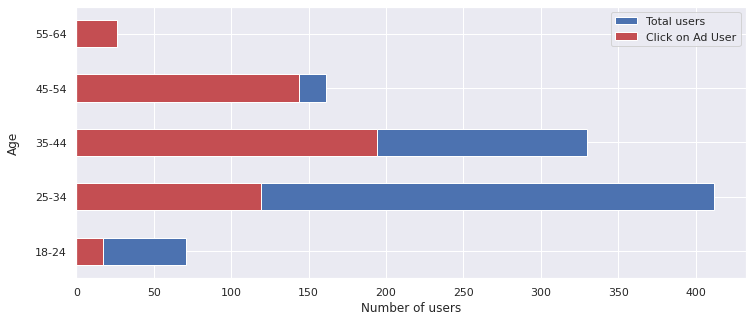

In [64]:
plt.figure(figsize = (12,5))
age['Age'].plot.barh(label = 'Total users')
age_clicked['Age'].plot.barh(label='Click on Ad User', color = 'r')
plt.ylabel('Age', labelpad = 15)
plt.xlabel('Number of users')
plt.yticks(np.arange(0,5), ['18-24', '25-34', '35-44', '45-54','55-64'])
plt.legend()
plt.show()

In [ ]:
# Reference 
## Matplotlib documentation